In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

### Normal distributions by addition

In [8]:
random_walks_4 =  [sum(np.random.uniform(-1, 1, 4)) for i in range(1000)]
random_walks_16 = [sum(np.random.uniform(-1, 1, 16)) for i in range(1000)]
random_walks_1000 = [sum(np.random.uniform(-1, 1, 1000)) for i in range(1000)]

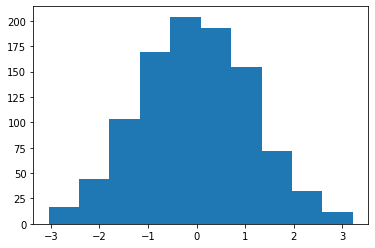

In [9]:
plt.hist(random_walks_4);

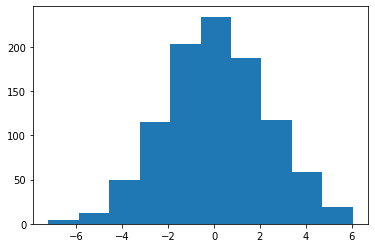

In [10]:
plt.hist(random_walks_16);

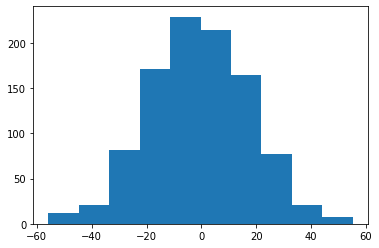

In [11]:
plt.hist(random_walks_1000);

any process that adds together tandom values from the same distribution converges to normal.

you can think of each value from the distribution of a fluctuation from the average value. when you add them all together, they cancel each other out. so there are the most ways to achieve net 0 (mean).

### Normal distributions by multiplications

In [18]:
random_growth_rate = np.prod(1 + np.random.uniform(0, 0.1, 12))
growth = [np.prod(1 + np.random.uniform(0, 0.1, 12)) for i in range(1000)]

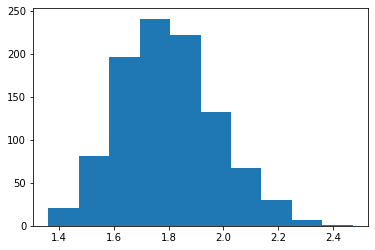

In [20]:
plt.hist(growth);

small effects are approximately additive

1.1 x 1.1 = (1 + 0.1) x (1 + .01) = 1 + 0.2 + 0.01 ~ 1.2

In [21]:
small_growth = [np.prod(1 + np.random.uniform(0, 0.1, 12)) for i in range(1000)]
big_growth = [np.prod(1 + np.random.uniform(0, 0.5, 12)) for i in range(1000)]

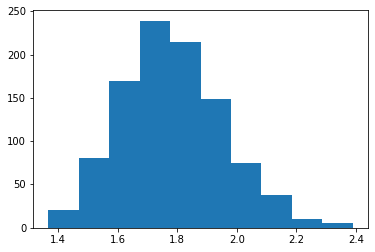

In [25]:
plt.hist(small_growth);

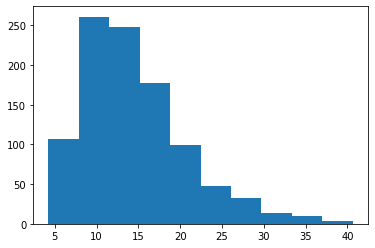

In [26]:
plt.hist(big_growth);

### Normal by log-multiplication

adding logs is equivalent to multiplying numbers.

In [27]:
log_big = [np.log(np.prod(1 + np.random.uniform(0, 0.5, 12))) for i in range(1000)]

In [35]:
print([np.prod(1 + np.random.uniform(0, 0.5, 12)) for i in range(1000)][::50])
print('')
print([np.log(np.prod(1 + np.random.uniform(0, 0.5, 12))) for i in range(1000)][::50])

[12.092409373040443, 9.73676767709551, 16.951533193566764, 14.66464312788808, 14.942602004442037, 20.79774458332564, 14.472080748116472, 14.488145670007645, 28.03412955465257, 15.632629061281012, 14.782184116727748, 14.22263787359323, 10.932247048540743, 17.804168694938355, 15.193649899047664, 18.59173169658544, 12.818729808241548, 10.31123044869003, 7.423201548968835, 17.89929127117557]

[3.1251840449699864, 2.4180939062639113, 3.0677331376021604, 2.34048893333521, 3.3442808922776934, 2.507611906701035, 3.0604050073020095, 2.6137359710002515, 3.2373024196346036, 2.696402345006278, 1.901181945063521, 2.381220849764021, 3.224168363469883, 2.598636339005458, 2.2205207913356753, 2.7909612638510524, 2.4383523010327974, 2.7630109846993913, 2.229096442820278, 2.6045799172567854]


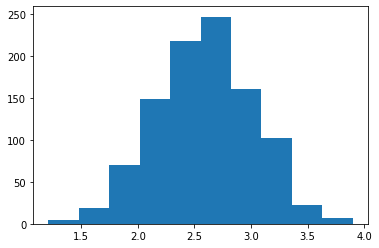

In [29]:
plt.hist(log_big);

### Why use Gaussian Distributions?

1. ontological - common in nature - 
    - because processes add fluctuations together; repeatdly adding finite fluctuations results in a distribution of sums that shed all infromation about the underlying process, aside from mean and spread.
    - cannot reliably identify micropprocess
2. epistemological - most conservative - we only know mean and variance - assumption that measure has finite variance; least surprising, least informative 

## Language For Describing Models

1. recognize set of measurements that we hope to predict or understand - **outcome variables**
2. for each outcome variable, define likelihood distribbution that defines the plausibility of individual observations (always Gaussian in regression)
3. Recgonize set of other measurements that we hope to use to predict or understand the outcome **predictor variables**
4. relate exact shape of likelihood distribution (location + variance) to predictor variables
5. choose priors for all parameters

outcome ~ Normal(mean, variance)

mean = B * predictor

B ~ Normal(0, 10)

variace ~ HalfCauchy(0, 1)

https://github.com/aloctavodia/Statistical-Rethinking-with-Python-and-PyMC3/blob/master/Chp_04.ipynb

In [2]:
example_heights = np.random.normal(178, 20, 100)

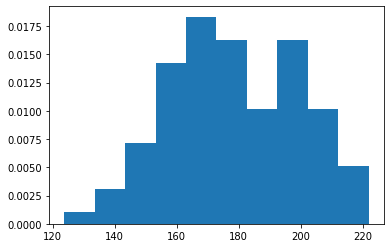

In [11]:
plt.hist(example_heights, density=True);

In [4]:
df = pd.read_excel('AdultHtWtOne_each_17985.xls')

WARNING *** file size (49344) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [5]:
df.head()

,caseid,ageobs,wtkgs,htcms,sick,pregnt,dateobs,bmi,expbmi,bmidiff,sex
0,8,32.0,38.243476,149.2250,0,3,NaN,17.174108,19.515552,-2.341444,2
1,15,20.8,47.700000,149.9000,0,0,1969.1,21.200000,19.000000,2.200000,2
2,17,36.0,48.562694,163.1950,0,0,NaN,18.234299,19.505996,-1.271697,2
3,19,30.0,38.356873,143.9418,0,3,NaN,18.512682,19.520330,-1.007648,2
4,24,28.0,42.722696,156.2100,0,3,NaN,17.508180,19.525108,-2.016928,2


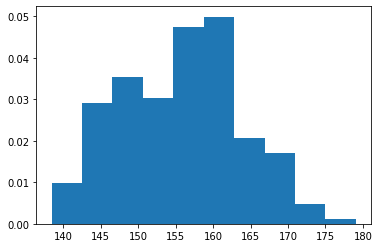

In [9]:
plt.hist(df['htcms'], density=True);

### Prior Predictive Distribution

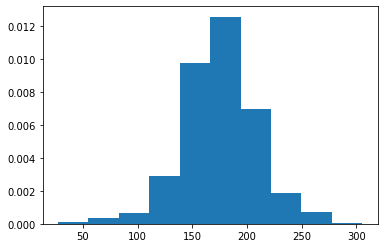

In [13]:
# normal - mean of 178 with stdev of 20
sample_mu = np.random.normal(178, 20, 1000)
# uniform between 0 and 50
sample_sigma = np.random.uniform(0, 50, 1000)
# prior
prior_h = np.random.normal(sample_mu, sample_sigma, 1000)

plt.hist(prior_h, density=True);

produces T distribution with fat tails...

but this distribution is creating possibility of 0cm and 300cm tall.

compute the posterior using grid approximation... (using mu and sigma)

In [14]:
import pymc3 as pm

In [16]:
# with pm.Model() as m4_1:
#     mu = pm.Normal('mu', mu=178, sd=20)
#     sigma = pm.Uniform('sigma', lower=0, upper=50)
#     height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)

In [17]:
# with m4_1:
#     trace_4_1 = pm.sample(1000, tune=1000)